In [2]:
import os
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import math
import scipy
from matplotlib import patches
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm


color_film    = '#beaed4'
color_music   = '#fdc086'
color_book    = '#7fc97f'
color_science = '#ffff99'

PAD = 15
LABELFONT = 17
TITLEFONT = 20

def format_axis(ax):
    for pos in ['right', 'top', 'left']:
        ax.spines[pos].set_edgecolor('white')    
    ax.tick_params(axis='x', length=6, width=2, colors='black', labelsize=14)
    ax.tick_params(axis='y', length=6, width=2, colors='black', labelsize=14) 

In [3]:
field_title = { 'director':      'Movie directors',
               'art-director':  'Movie art directors',
               'dir':      'Movie directors',
                'art_director':  'Movie art directors',
                'producer':      'Movie producers' ,
                'prod':      'Movie producers' ,
                'composer':      'Soundtrack composers',
                'writer':        'Plot writers',
                'authors':       'Book authors',
                'books':       'Book authors',
                'electro':       'Electronic music artists', 
                'rock':          'Rock musicians',
                'pop':           'Pop musicians',
                'jazz':          'Jazz musicians',
                'folk':          'Folk musicians',
                'funk':          'Funk musicians',
                'hiphop':        'Hip-hop artists',
                'classical':     'Classical musicians',
                 'class':     'Classical musicians',
                'zoology'  :      'Zoology',   
                'geology'  :      'Geology',
                'mathematics' :       'Mathematics', 
                'chemistry':        'chemistry',
                'space_science_or_astronomy'  :  'Space Science or Astronomy' ,
                'applied_physics'             :  'Applied Physics',  
                'agronomy'                    :  'Agronomy',    
                'physics'                     :  'Physics',     
                'engineering'                 :  'Engineering',     
                'theoretical_computer_science':  'Theoretical Computer Science',    
                'biology'                     :  'Biology',  
                'environmental_science'       :  'Environmental Science'  ,  
                'political_science'           :  'Political Science'  ,
                'health_science'              :  'Health Science'} 

film    = ['director', 'composer', 'writer', 'art_director', 'prod', 'dir', 'producer']
books   = ['books']
music   = ['funk',  'rock', 'jazz', 'hiphop', 'folk',  'pop', 'class', 'classical', 'electro']
science = ['zoology','geology', 'mathematics', 'chemistry', 'space_science_or_astronomy',  'applied_physics',  'agronomy', 'physics', 'engineering',  'theoretical_computer_science', 'biology', 'environmental_science', 'political_science', 'health_science']        

# Figure 1

In [4]:
def plot_career(ax, name, ylabel, color, ttitle ):
 
    time, impact = zip(*[[float(l) for l in line.strip().split('\t')] for line in open('data/Fig1_' + name)])
    maximpact    = max(impact)
    besttime     = time[list(impact).index(maximpact)]
    time, impact = zip(*[(time[i], impact[i]) for i in range(len(time)) if impact[i] != maximpact])
    
    [ax.axvline(x = time[i], ymin = 0, ymax = impact[i]/(1.15*maximpact+0.01*maximpact),  linewidth = 2, color = 'grey')  for i in range(len(time))]
    ax.plot(time, impact, 'o', color = color, markersize = 8, alpha = 0.9, markeredgecolor='grey', markeredgewidth = 1)#, linewidth='0' 
    ax.axvline(x = besttime, ymin = 0, ymax = maximpact/(1.15*maximpact+0.01*maximpact),  linewidth = 2, color = 'grey')
    ax.plot(besttime,  maximpact,  color = 'yellow', marker= "*", markersize = 24, alpha = 0.9, markeredgecolor='grey', markeredgewidth = 2.5)#, label = title)
    ax.set_xlabel('Year', fontsize = LABELFONT, labelpad = PAD)
    ax.set_ylabel(ylabel,  fontsize = LABELFONT, labelpad = PAD)
    ax.set_title(ttitle, fontsize = TITLEFONT-2, pad = PAD-2, loc= 'left')
 
    ax.yaxis.grid(color = 'grey', linewidth = 0.25)
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    #ax.set_title(name, fontsize = TITLEFONT)
    ax.set_xlim([min(time)-2,max(time)+2])
    ax.set_ylim([-0.01*maximpact,1.15*maximpact])
    format_axis(ax)

    
def plot_luckcurve(ax, field, title, limit, color):

    with open('data/Fig1_luckcurve_all_' + field + '_Q') as myfile:
        data = myfile.read().split('\n')
        for ind, d in enumerate(data):
            if len(d.split('\t')) == 2:
                X, Y = d.split('\t')
                X    = [float(x) for x in X.split(';')]
                Y    = [float(y) for y in Y.split(';')]
                if ind == 0:
                    ax.plot(X, Y, linewidth = 0.5,alpha = 0.3, color = 'lightgrey', label = 'Individuals')
                else:
                    ax.plot(X, Y, linewidth = 0.5,alpha = 0.3, color = 'lightgrey')
                
    with open('data/Fig1_luckcurve_agg_' + field) as myfile:
        X, Y = myfile.read().split('\t')
        X    = [float(x) for x in X.split(' ')]
        Y    = [float(y) for y in Y.split(' ')]
                            
            
    ax.set_title(title, fontsize = TITLEFONT-2, pad = PAD-2)
    ax.set_ylabel('P(> $p_{i,\\alpha}$)', fontsize = LABELFONT, labelpad = PAD)
    ax.set_xlabel('$p_{i,\\alpha}$', fontsize = LABELFONT, labelpad = PAD)         
    ax.plot(X, Y, linewidth = 3, color = color, label = 'Aggregated')
    leg = ax.legend(loc = 'lower left', frameon = False, fontsize = 10)
    
    for l in leg.get_lines():
        l.set_alpha(1)
        l.set_linewidth(2)
    ax.set_xlim(limit)
    ax.set_xscale('log')
    format_axis(ax)


FileNotFoundError: [Errno 2] No such file or directory: 'data/Fig1_luckcurve_all_mathematics_Q'

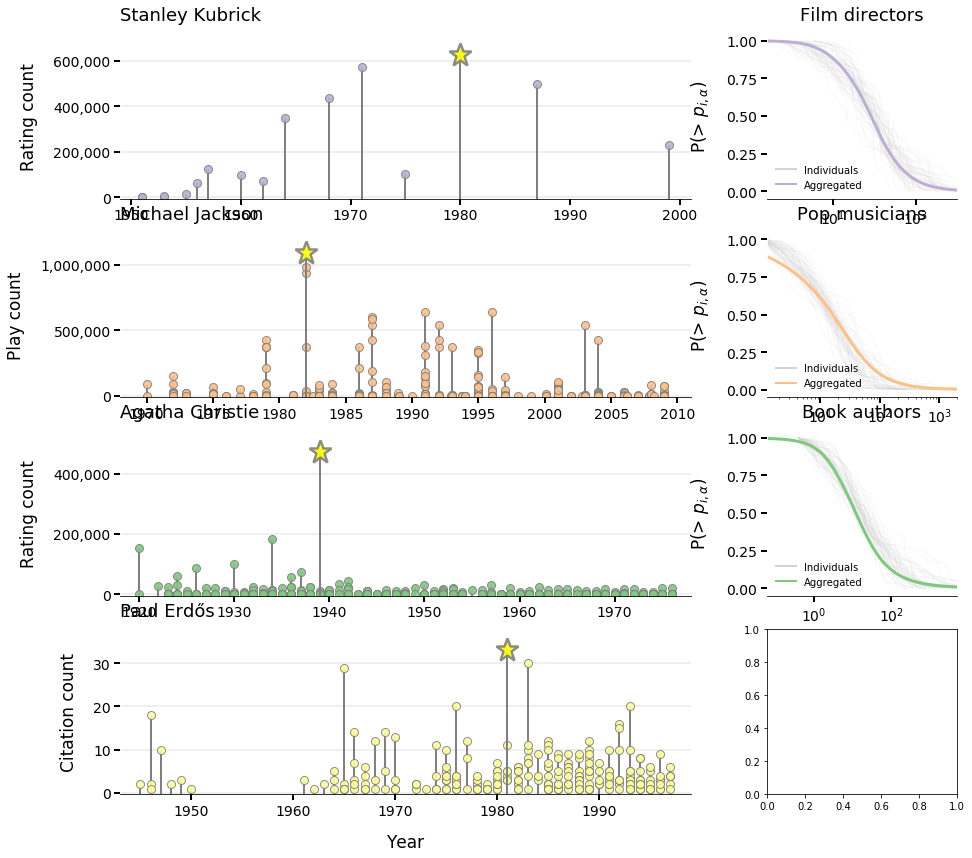

In [5]:
f, ax = plt.subplots(4,2, gridspec_kw = {'width_ratios':[3, 1]}, figsize=(15,14))

plot_career(ax[0,0], 'Stanley Kubrick', 'Rating count',   color_film, 'Stanley Kubrick') 
plot_career(ax[1,0], 'Michael Jackson', 'Play count',     color_music, 'Michael Jackson') 
plot_career(ax[2,0], 'AgathaChristie',  'Rating count',   color_book, 'Agatha Christie') 
plot_career(ax[3,0], 'Pal Erdos',       'Citation count',  color_science, 'Paul Erdős') 

plot_luckcurve(ax[0,1], 'director',    'Film directors', [0.25,   10000], color_film)
plot_luckcurve(ax[1,1], 'pop',         'Pop musicians',  [1.25, 2000],  color_music)
plot_luckcurve(ax[2,1], 'books',       'Book authors',   [0.06, 5000],  color_book)
plot_luckcurve(ax[3,1], 'mathematics', 'Mathematicians', [10.0,   5000],  color_science)
    
ax[0,0].annotate("a", xy=(-0.2, 1.1), xycoords="axes fraction", fontsize = LABELFONT,     weight="bold")
ax[1,0].annotate("b", xy=(-0.2, 1.1), xycoords="axes fraction", fontsize = LABELFONT,     weight="bold")
ax[2,0].annotate("c", xy=(-0.2, 1.1), xycoords="axes fraction", fontsize = LABELFONT,     weight="bold")
ax[3,0].annotate("d", xy=(-0.2, 1.1), xycoords="axes fraction", fontsize = LABELFONT,     weight="bold")

ax[0,1].annotate("e", xy=(-0.41, 1.1), xycoords="axes fraction", fontsize = LABELFONT,     weight="bold")
ax[1,1].annotate("f", xy=(-0.41, 1.1), xycoords="axes fraction", fontsize = LABELFONT,     weight="bold")
ax[2,1].annotate("g", xy=(-0.41, 1.1), xycoords="axes fraction", fontsize = LABELFONT,     weight="bold")
ax[3,1].annotate("h", xy=(-0.41, 1.1), xycoords="axes fraction", fontsize = LABELFONT,     weight="bold")
    
ax[0,0].get_yaxis().set_label_coords(-0.14,0.5)    
ax[1,0].get_yaxis().set_label_coords(-0.14,0.5)
ax[2,0].get_yaxis().set_label_coords(-0.14,0.5)    
ax[3,0].get_yaxis().set_label_coords(-0.14,0.5)    

plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.77)
plt.savefig('text/Figures/Figure1.png', bbox_inches='tight')

# Figure 2

In [ ]:
def plot_p_q_illustration(ax1, ax2):

    x1, y1, x2, y2, X1, Y1, X2, Y2 = zip(*[[float(l) for l in line.strip().split('\t')] for line in open('data/Fig2_pQ_illustration.dat')])

    ax1.set_title('Field A, $R \\to 0$', fontsize = TITLEFONT-5, pad = PAD)
    ax2.set_title('Field B, $R \\to 1$', fontsize = TITLEFONT-5, pad = PAD)
    
    ax1.plot(x1, y1, linewidth=2, color='crimson',   label = '$P(\hat{p})$')#, $\\sigma_{\hat{p}} = 0.02$')
    ax1.plot(x2, y2, linewidth=2, color='steelblue', label = '$P(\hat{Q})$')#, $\\sigma_{\hat{p}} = 0.2$')
             
    ax2.plot(X1, Y1, linewidth=2, color='crimson',   label = '$P(\hat{p})$')#, $\\sigma_{\hat{p}} = 0.25$')
    ax2.plot(X2, Y2, linewidth=2, color='steelblue', label = '$P(\hat{Q})$')#, $\\sigma_{\hat{p}} = 0.02$')
         
         
    ax1.legend(loc= 'upper right', fontsize = 12, frameon = False, handlelength = 0.5, bbox_to_anchor=(0.3, 1.0))
    ax1.xaxis.set_ticklabels([])
    ax1.yaxis.set_ticklabels([])
    format_axis(ax1)
    ax2.legend(loc= 'upper right', fontsize = 12, frameon = False, handlelength = 0.5, bbox_to_anchor=(0.3, 1.0))
    ax2.xaxis.set_ticklabels([])
    ax2.yaxis.set_ticklabels([])   
    ax1.get_yaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)
    ax1.set_ylim([1*min(y1), 1.1*max(y1)])
    ax2.set_ylim([1*min(y2), 1.1*max(y2)])
    
    format_axis(ax2)
    
    

  
def plot_truescore_illustration(ax1, ax2, ax3):
    
    x1, y1, x2, y2, x3, y3 = zip(*[[float(l) for l in line.strip().split('\t')] for line in open('data/Fig2_truescore_illustration.dat')])
    
    ax1.plot(x1, y1, color = 'darkgreen')
    ax1.fill_between(np.asarray(x1), 0, np.asarray(y1), facecolor="none", hatch="//", edgecolor="darkgreen", linewidth=0.0)

    ax2.plot(x2, y2, color = 'steelblue')
    ax2.fill_between(np.asarray(x2), 0, np.asarray(y2), facecolor="none", hatch="X", edgecolor="steelblue", linewidth=0.0)

    ax3.plot(x3, y3, color = 'crimson')
    ax3.fill_between(np.asarray(x3), 0, np.asarray(y3), facecolor="none", hatch="\\", edgecolor="crimson", linewidth=0.0)

    
    ax1.set_xlim([-0.09,0.09])
    ax2.set_xlim([-0.1,0.12])

    for axax in [ax1, ax2, ax3]:
        axax.legend(loc= 'best', fontsize = 1, frameon = False)
        axax.xaxis.set_ticklabels([])
        axax.yaxis.set_ticklabels([])
        format_axis(axax)
        axax.get_yaxis().set_visible(False) 
        axax.set_ylim([1*min(y1), 1.1*max(y1)])


    ax1.text(0.12, 0.55, "=", size=15, rotation=0., ha="center", va="center", alpha = 0.8, color = 'k', bbox=dict(boxstyle="round",ec='k', fc='white') ) 
    ax2.text(0.16, 0.55, "+", size=15, rotation=0., ha="center", va="center", alpha = 0.8, color = 'k', bbox=dict(boxstyle="round",ec='k', fc='white') ) 
        
    ax1.set_title('Observed value\n(e.g. Impact)', fontsize = TITLEFONT-6, pad = PAD)
    ax2.set_title('True value\n(e.g. $Q$)',        fontsize = TITLEFONT-6, pad = PAD)
    ax3.set_title('Random error\n(e.g. $p$)',      fontsize = TITLEFONT-6, pad = PAD) 

 


def draw_success_bars(tipus, elements, ax, color, ticksorlabels = True, labelcolor = 'k'):
    
    fields, skill, skillerr = zip(*sorted([line.strip().split('\t') for line in open('data/Fig2_rescaled_skill_luck_final.dat')], key=lambda tup: tup[1], reverse = True))

    skill    = [100-float(s) for s in skill]
    skillerr = [float(s) for s in skillerr]
    
    y      = np.arange(0,1,1.0/(len(elements)+1))
    jind   = 0
    labels = ['']
    ticks  = [0]
        
    for domain, color in [(science, color_science), (books, color_book), (music, color_music),(film, color_film)]:  
        for ind, field in enumerate(fields):
            if field in domain:
                ax.barh( jind*0.05, 75, height = 0.035, edgecolor = 'lightgrey', color = 'lightgrey', alpha = 0.1)
                ax.barh( jind*0.05, skill[ind], height = 0.035,  color = color, alpha = 0.6)
                ax.text(55.65, jind*0.05-0.007, str(round(skill[ind]/100,3)) , fontsize=11,color='k')

                if ticksorlabels:
                    ax.text(49.38, jind*0.05-0.007, field_title[field], fontsize=13,color='k', fontweight='bold')
                labels.append(field)
                ticks.append(jind*0.05+0.01)
                jind += 1
                      
    if not ticksorlabels:        
        ax.set_yticks(ticks)
        ax.set_yticklabels(labels, fontsize=14)
    else:
        ax.set_yticklabels(['', ''], fontsize=0)


def get_barplot(ax):

    NNN    = 100.0
    values = np.arange(0.0,1.0,1.0/NNN)
    values = np.asarray([np.asarray(values), np.asarray(values)])
    ax.set_xlim([49.3,56])
    ax.get_xaxis().set_visible(False)
    for t in ['top', 'bottom',  'right', 'left']:
        ax.spines[t].set_color('white')  

    draw_success_bars('Film', film, ax, color_film)



#f, ax = plt.subplots(1,3,figsize=(10,3))
#plot_truescore_illustration(ax)

fig = plt.figure(figsize=(15, 22))
grid = plt.GridSpec(7, 27, hspace=0.3, wspace=0.6, height_ratios=[0.8, 0.8,0.65,0.8,0.8, 0.5,15])

#gs = gridspec.GridSpec(4, 1, ) 

ax3 = plt.subplot(grid[0:2, 0:3])
ax4 = plt.subplot(grid[0:2, 4:7])
ax5 = plt.subplot(grid[0:2, 8:11])

ax1 = plt.subplot(grid[3:5, 0:5])
ax2 = plt.subplot(grid[3:5, 7:12])

ax7 = plt.subplot(grid[6, 0:])

ax6 = plt.subplot(grid[0:4, 17:])

plot_varplane(ax6)
plot_p_q_illustration(ax1, ax2)
get_barplot(ax7)

plot_truescore_illustration(ax3, ax4, ax5)

ax3.annotate("a", xy=(-0.7, 1.25), xycoords="axes fraction", fontsize = 18,    weight="bold")
ax1.annotate("b", xy=(-0.4, 1.25), xycoords="axes fraction", fontsize = 18,    weight="bold")
ax6.annotate("c", xy=(-0.35, 1.09), xycoords="axes fraction", fontsize = 18,    weight="bold")
ax7.annotate("d", xy=(-0.06, 0.93), xycoords="axes fraction", fontsize = 18,    weight="bold")


#ax[0,0].get_yaxis().set_label_coords(-0.14,0.5)    
##ax[1,0].get_yaxis().set_label_coords(-0.14,0.5)
#ax[2,0].get_yaxis().set_label_coords(-0.14,0.5)    
#ax[3,0].get_yaxis().set_label_coords(-0.14,0.5)  


plt.savefig('text/Figures/Figure2.png', bbox_inches='tight')
#plt.tight_layout()   
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.6, hspace=0.6)

In [ ]:
def draw_isoimpact_line2(radius, ax):
    
    radius = 2*radius / 3.0
    
    y = [radius - r for r in list(np.arange(0, radius, 0.1) )]
    x = np.arange(0, radius, 0.1)
    ax.plot(x,y, color = 'k', linewidth = 0.3, label = 'Iso-impact lines')
    ax.fill_between(x, np.asarray([0]*len(y)), y, alpha=0.05, facecolor='k',
        edgecolor='yellow', linewidth=1, zorder=1)      
    


def varpvarq2(allfields, allqs, allps, tipus, elements, ax, color, 
             circle = True, 
             markersize = 8,
             legendfont = 8):

    fields, varq, varqerr, varp, varperr =zip(*[line.strip().split('\t') for line in open('data/Fig2_rescaled_varq_varp_final.dat')])

    varq    = [float(v) for v in varq]
    varqerr = [float(v) for v in varqerr]
    varp    = [float(v) for v in varp]
    varperr = [float(v) for v in varperr]
    
    
    allqs += varq
    allps += varp
    allfields += fields
    
    limx  = [0.3,  0.55]
    limy  = [0.35, 0.55]    
    
    if circle:
        minr  = 2 * math.sqrt(min(limx)**2 + min(limy)**2)
        maxr  = 2 * math.sqrt(max(limx)**2 + max(limy)**2)
        radii = np.arange(minr, maxr, 0.01 )
        #draw_isoimpact_linefor radius in radii:
        #    draw_isoimpact_line(radius, ax)        

       # draw_isoimpact_line2(radius, ax)    
            

    for ind, field in enumerate(fields):
        if field in elements:
            if len(color) > 0:
                ax.errorbar(varq[ind], varp[ind], xerr = varqerr[ind], yerr = varperr[ind], 
                    alpha = 0.75, markersize = markersize, fmt='o', color = color)
            else:
                ax.errorbar(varq[ind], varp[ind], xerr = varqerr[ind], yerr = varperr[ind], 
                    alpha = 0.75, markersize = markersize, fmt='o', label = field)
             
    if len(color) > 0:            
        ax.errorbar(varq[0], varp[0], xerr = varqerr[ind], yerr = varperr[ind], 
            alpha = 0.75, markersize = 8, fmt='o', color = color, label = tipus)
                
    ax.legend(loc = 'lower right', fontsize = legendfont, frameon = True)
    ax.set_xlim(limx)
    ax.set_ylim(limy)         


def draw_isoimpact_line(radius, ax):
    radius = 2*radius / 3.0
    y = [radius - r for r in list(np.arange(0, radius, 0.1) )]
    x = np.arange(0, radius, 0.1)
    ax.fill_between(x, np.asarray([0]*len(y)), y, alpha=0.02, facecolor='k',
        edgecolor='yellow', linewidth=1, zorder=2)      
    
   
def plot_varplane(ax):

    allqs = []
    allps = []
    allfields = []
    varpvarq2(allfields, allqs, allps, 'Film',    film,    ax, color = color_film,  markersize = 14)    
    varpvarq2([], [], [], 'Book',    books,   ax, color = color_book,  circle = False, markersize = 14, legendfont = 14)  
    varpvarq2([], [], [], 'Music',   music,   ax, color = color_music,    circle = False, markersize = 14, legendfont = 14)    
    varpvarq2([], [], [], 'Science', science, ax, color = color_science, circle = False, markersize = 14, legendfont = 14)    

    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(allqs, allps)

    ax.set_ylabel('$\sigma_\hat{p}$', fontsize = 21, labelpad = 20)
    ax.set_xlabel('$\sigma_\hat{Q}$', fontsize = 21, labelpad = 20)
    ax.set_ylim([0.33, 0.55])
    ax.set_xlim([0.33, 0.55])

    ax.plot([0,1],[0,1],  color = 'grey', linewidth = 4, alpha = 0.5, label = 'Diagonal line')
    
    x, y = allqs, intercept + slope*np.asarray(allqs)
    x, y = zip(*sorted([(x[i], y[i]) for i in range(len(x))], key = lambda tup: tup[0]))
    ax.plot(x,y, '--', color = 'k', linewidth = 3, alpha = 0.8,  label='regression line')
   
    ax.legend(loc = 'lower right', fontsize = 13, frameon = True)

    r     = list(np.arange(0.33, 0.55, 0.001))
    N     = len(r)
    bckgr = np.zeros((N, N))

    for ind1, r1 in enumerate(r):
        for ind2, r2 in enumerate(r):
            bckgr[N-ind1-1, ind2] = (r1 + r2)

    r = np.asarray(r)
    dx = (r[1]-r[0])/2.
    dy = (r[1]-r[0])/2.
    extent = [r[0]-dx, r[-1]+dx, r[0]-dy, r[-1]+dy]
    im = ax.imshow(bckgr, extent=extent, cmap = plt.cm.bone, vmin=0.7, vmax=1.0)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = f.colorbar(im, cax=cax, orientation='vertical')#, norm=matplotlib.colors.Normalize(vmin=0.0, vmax=100.5))
    cbar.set_clim(0.2, 1.1)    
    format_axis(ax)

    
f, ax = plt.subplots(1,figsize=(7,6.7))   
plot_varplane(ax)

# Figure 3

In [ ]:
'''
BASED ON NETWORK_PART/4_NetworkersNonnetworkers.ipynb
'''
    
def plot_career_cent(ax, name, ylabel, color, ttile , dirr):
 
    impact, network = zip(*[[float(l) for l in line.strip().split('\t')] for line in open('data/Fig3_' + name + '.dat')])
    maximpact    = max(impact)
    
    #[ax.axvline(x = i, ymin = 0, ymax = impact[i]/(1.15*maximpact+0.01*maximpact),  linewidth = 2, color = 'grey')  for i in range(len(impact))]
    #ax.plot(range(len(impact)), impact, 'o', color = color, markersize = 8, alpha = 0.9, markeredgecolor='grey', markeredgewidth = 1)#, linewidth='0' 
    #ax.axvline(x = besttime, ymin = 0, ymax = maximpact/(1.15*maximpact+0.01*maximpact),  linewidth = 2, color = 'grey')
    #ax.plot(besttime,  maximpact,  color = 'yellow', marker= "*", markersize = 24, alpha = 0.9, markeredgecolor='orange', markeredgewidth = 2.5)#, label = title)
    #ax.set_xlabel('Movies', fontsize = LABELFONT, labelpad = PAD)
    ax.set_ylabel(ylabel,  fontsize = LABELFONT, labelpad = PAD)
    ax.set_title(ttile, fontsize = TITLEFONT, pad = PAD, loc= 'left')
    ax.yaxis.grid(color = 'grey', linewidth = 0.25)
 
    ax.plot(impact, 'o', color = color, markersize = 8, alpha = 0.9, markeredgecolor='grey', markeredgewidth = 1, label = 'Normalized impact    ')

    #ax.plot(impact, 'o', markersize= 12, linewidth = 0, color = color
    
    ax1 = ax.twinx()
    ax1.plot(network,'-', linewidth = 5, alpha = 0.5, color = color, label = '\nNormalized pagerank\ncentrality')
    ax.legend(loc  = 'upper ' + dirr, frameon = False, fontsize = 12)
    ax1.legend(loc = 'upper ' + dirr, frameon = False, fontsize = 12)

    ax.set_ylim([-0.01*maximpact,1.15*maximpact])
    ax1.set_ylim([0,1.15*max(network)])

    format_axis(ax)
    format_axis(ax1)
 
    [ax.axvline(x = i, ymin = 0, ymax = impact[i]/(1.15*maximpact+0.01*maximpact),  linewidth = 2, color = 'grey')  for i in range(len(network))]
    #ax.plot(time, impact, 'o', color = color, markersize = 8, alpha = 0.9, markeredgecolor='grey', markeredgewidth = 1)#, linewidth='0' 
    #ax.axvline(x = besttime, ymin = 0, ymax = maximpact/(1.15*maximpact+0.01*maximpact),  linewidth = 2, color = 'grey')
    #ax.plot(besttime,  maximpact,  color = 'yellow', marker= "*", markersize = 24, alpha = 0.9, markeredgecolor='grey', markeredgewidth = 2.5)#, label = title)
    #ax.set_xlabel('Year', fontsize = LABELFONT, labelpad = PAD)
    #ax.set_ylabel(ylabel,  fontsize = LABELFONT, labelpad = PAD)
    #ax.set_title(ttitle, fontsize = TITLEFONT-2, pad = PAD-2, loc= 'left')    
    
    
def plot_networkermeas(ax, labell, meas, color, lllabel, field, measmm):
    
    x1, y1, err1 = zip(*[[float(l) for l in line.strip().split('\t')] for line in open('data/network/QDistributionPos_'+field+'_'+measmm+'.dat')])
    x2, y2, err2 = zip(*[[float(l) for l in line.strip().split('\t')] for line in open('data/network/QDistributionNeg_'+field+'_'+measmm+'.dat')])

    for line in open('data/network/QDistributionKS_'+field+'_'+measmm+'.dat'):
        KS, p = line.strip().split('\t')
        
    KS = str(round(float(KS), 2))
    p  = '{:.1e}'.format(float(p))    
    
    ax.set_title(lllabel + ', ' + meas_d[measmm]+ '\n(KS = ' + KS + ', p = '+p +')', fontsize = 16)
    ax.errorbar(x1,y1,fmt = 'o--', yerr = err1, markersize = 11, linewidth = 2 ,label = 'Network first', color = color)
    ax.errorbar(x2,y2, fmt='-',  yerr = err2, marker= 'x', markersize = 14, linewidth = 2, label = 'Impact first', color = color)
    
    ax.set_xlabel(labell, fontsize = 16, labelpad = 10)
    ax.set_ylabel('$P($' + labell + '$)$', fontsize = 16, labelpad = 10)
    ax.set_xscale('log')
    ax.set_yscale('log')
    format_axis(ax)
 

def plot_randomized(ax, llabel, field, meas, color):
    
    x_o, y_o = zip(*[[float(l) for l in line.strip().split('\t')] for line in open('data/network/TauDistribution_'+field+'_'+meas+'.dat')])
    x_r, y_r = zip(*[[float(l) for l in line.strip().split('\t')] for line in open('data/network/TauDistributionRand_'+field+'_'+meas+'.dat')])
    
    for line in open('data/network/TauDistributionKS_'+field+'_'+meas+'.dat'):
        KS, p = line.strip().split('\t')
    
    KS = str(round(float(KS), 2))
    p  = '{:.1e}'.format(float(p))
    
    ax.set_title(llabel + ', ' + meas_d[meas]+ '\n(KS = ' + KS + ', p = '+p +')', fontsize = 16)
    ax.plot(x_r, y_r, 'o--', linewidth = 2, color = 'lightgrey', alpha = 0.9, label = 'Randomized')
    ax.plot(x_o, y_o, 'o--', linewidth = 2, color = color, alpha = 0.9,  label = llabel +' data')  
    
    format_axis(ax)
    ax.legend(loc = 'best')
       
    ax.set_ylabel('P($\\tau$)', fontsize = 17)
    ax.set_xlabel('$\\tau$',    fontsize = 17)
    ax.set_yscale('log')
       
    
    
    
    
    
fig  = plt.figure(figsize=(15, 9))
grid = plt.GridSpec(2, 6,height_ratios=[0.4,0.5])

ax1 = plt.subplot(grid[0, 0:3])
ax2 = plt.subplot(grid[0, 3:])

ax3 = plt.subplot(grid[1, 0:2])
ax4 = plt.subplot(grid[1, 2:4])
ax5 = plt.subplot(grid[1, 4:])


meas_d = {'deg' : 'degree', 'clust' : 'clustering', 'pr' : 'pagerank'}

plot_career_cent(ax1,   'George_Lucas', '', color_film, 'George Lucas\n$\\tau = -1$', 'left' ) 
#plot_career_cent(ax2,   'Shakira', '', color_film, 'Shakira'  ) 
plot_career_cent(ax2,   '150182', '', color_music, 'Mathieu Gonet\n$\\tau = 1$', 'right'  ) 



plot_networkermeas(ax3, '$Q$',   'Q',    color_film,   'Film directors', 'Film', 'clust')
plot_networkermeas(ax4, '$S_{\\rm max}$','maxI', color_science, 'Mathematicians', 'Science', 'deg')
plot_randomized(ax5, 'Pop music', 'Music', 'pr', color_music)


ax1.annotate("a", xy=(-0.2, 1.20), xycoords="axes fraction", fontsize = 18,    weight="bold")
ax3.annotate("b", xy=(-0.35, 0.95), xycoords="axes fraction", fontsize = 18,    weight="bold")
ax4.annotate("c", xy=(-0.35, 0.95), xycoords="axes fraction", fontsize = 18,    weight="bold")
ax5.annotate("d", xy=(-0.35, 0.95), xycoords="axes fraction", fontsize = 18,    weight="bold")



plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.7, hspace=0.7)
plt.savefig('text/Figures/Figure3.png', bbox_inches='tight')